# Week 3- Data Analysis + Feature Engineering

### Additional Data cleaning to do for next data extraction

1. Clean height to number
2. Get year of player with the data
3. Filter amongst the failed cases to get more data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("all_player_data.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [125]:
# ncaa_data = [0] + [num for num in range(len(data.columns)) if 'NCAAB' in data.columns[num]]

In [126]:
# train = data.loc[:, ncaa_data]

IndexError: positional indexers are out-of-bounds

In [127]:
train = data

In [128]:
import sklearn

In [129]:
from sklearn.decomposition import PCA

In [130]:
nan_col = train.columns[train.isna().any()].tolist()

In [134]:
train.set_index('name', inplace=True)

In [135]:
no_null = train.drop(columns=nan_col)

In [136]:
qual_col = no_null.select_dtypes(['object']).columns

In [137]:
all_quan = no_null.drop(columns=qual_col)

In [138]:
all_quan.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,1.8,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,0.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,0.7,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,0.2,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
df2 = all_quan
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col])
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2 = df2.dropna()

In [141]:
df2.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
name,,,,,,,,,,,,,,,,,,,,,
Landry Fields,-0.207399,1.244073,-0.499657,0.264757,0.912686,0.0,0.407494,0.545355,3.647902,1.872224,...,-0.218631,-0.633291,0.550241,1.890478,0.003312,1.775926,1.586557,0.087808,0.765881,0.507214
Andy Rautins,0.825272,-0.565032,-0.745330,-0.632718,-2.079855,0.0,-1.180687,-1.010799,-0.793781,-0.757347,...,1.302335,2.381757,1.144171,-2.257585,0.834408,-2.064611,-1.383927,-0.714148,0.102087,-0.186943
Patrick Patterson,-0.356444,-0.112756,0.728706,1.320610,0.894658,0.0,0.551874,0.103893,0.415641,0.265264,...,1.133339,-1.490782,-1.112762,0.579964,1.748615,1.200872,-1.474629,0.889764,1.369330,0.864811
Gani Lawal,-1.165547,-0.600738,-0.745330,-0.632718,-0.078819,0.0,0.551874,-1.540553,-0.804484,-0.757347,...,-0.493250,0.362505,0.352264,0.796483,0.169531,0.810657,0.362083,0.849667,-0.380672,-0.102803
Cole Aldrich,-0.739703,-0.553130,1.023513,-0.263169,0.660303,0.0,1.309869,0.390843,-0.569022,-0.465173,...,0.541852,0.030573,-0.518833,0.124133,0.684811,0.338292,-1.043796,1.290743,0.705536,1.327582


In [158]:
nba_col = [num for num in range(len(d.columns)) if 'NBA' in d.columns[num]]
ncaab_col = [num for num in range(len(d.columns)) if 'NCAAB' in d.columns[num]]


In [164]:
cols = d.iloc[:, ncaab_col].columns
for num in range(len(ncaab_col)):
    print(num + len(nba_col), cols[num])

(45, 'NCAAB_assist_percentage')
(46, 'NCAAB_assists')
(47, 'NCAAB_block_percentage')
(48, 'NCAAB_blocks')
(49, 'NCAAB_defensive_rebound_percentage')
(50, 'NCAAB_defensive_rebounds')
(51, 'NCAAB_defensive_win_shares')
(52, 'NCAAB_effective_field_goal_percentage')
(53, 'NCAAB_field_goal_attempts')
(54, 'NCAAB_field_goal_percentage')
(55, 'NCAAB_field_goals')
(56, 'NCAAB_free_throw_attempt_rate')
(57, 'NCAAB_free_throw_attempts')
(58, 'NCAAB_free_throw_percentage')
(59, 'NCAAB_free_throws')
(60, 'NCAAB_games_played')
(61, 'NCAAB_games_started')
(62, 'NCAAB_minutes_played')
(63, 'NCAAB_offensive_rebound_percentage')
(64, 'NCAAB_offensive_rebounds')
(65, 'NCAAB_offensive_win_shares')
(66, 'NCAAB_personal_fouls')
(67, 'NCAAB_points')
(68, 'NCAAB_points_produced')
(69, 'NCAAB_steal_percentage')
(70, 'NCAAB_steals')
(71, 'NCAAB_three_point_attempt_rate')
(72, 'NCAAB_three_point_attempts')
(73, 'NCAAB_three_pointers')
(74, 'NCAAB_total_rebound_percentage')
(75, 'NCAAB_total_rebounds')
(76, 'NCA

In [165]:
nba_i = [1,3,4,11,12,15,25,27,32,34,36,37]

In [166]:
ncaa_i = [46, 48, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 67, 70, 72, 73, 75, 78, 79, 80, 85]

In [167]:
nba_important = d.iloc[:, nba_i]
ncaab_important = d.iloc[:, ncaa_i]

In [169]:
important = d.iloc[:, nba_i + ncaa_i]

In [175]:
corr = important.corr()

In [176]:
np.zeros_like(corr, dtype=np.bool)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [201]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [342]:
pca.explained_variance_ratio_

array([0.25809049, 0.18081983])

AxesSubplot(0.125,0.166667;0.62x0.671667)


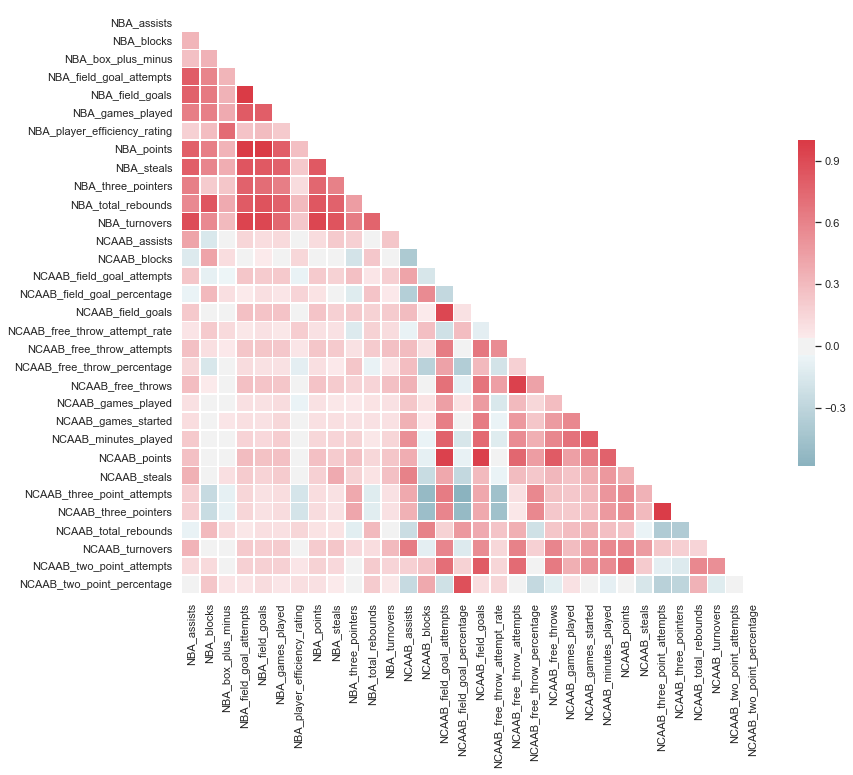

In [212]:
f, ax = plt.subplots(figsize=(13, 12))
print(sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))


In [216]:
from sklearn.cluster import KMeans

In [338]:
df2.shape

(532, 86)

In [225]:
pca = PCA(n_components=2)
pca_fitted = pca.fit_transform(df2.values)
pca_fitted.shape

(532, 2)

In [226]:
pca_fitted

array([[11.40917276, -0.26131746],
       [-4.65999889, -4.8012677 ],
       [ 3.31488228,  3.63211514],
       ...,
       [-4.96849822, -3.68480895],
       [-4.14292659, -0.8426134 ],
       [-3.47251955, -1.08276468]])

In [236]:
from sklearn.cluster import KMeans

In [247]:
plt.cm.Set1

<module 'matplotlib.cm' from '/Users/calvin/anaconda2/lib/python2.7/site-packages/matplotlib/cm.pyc'>

In [262]:
pca_fitted[:, 0].shape

(532,)

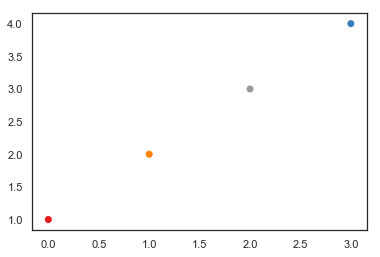

In [274]:
x = [0, 1, 2, 3]
y = [1, 2, 3, 4]
label = [0, 0.5, 1, 0.2]
plt.scatter(x, y, color=plt.cm.Set1(label))

In [294]:
plt.cm.Set1(label)

array([[0.89411765, 0.10196078, 0.10980392, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ],
       [0.6       , 0.6       , 0.6       , 1.        ],
       [0.21568627, 0.49411765, 0.72156863, 1.        ]])

In [276]:
y / np.linalg.norm(y)

array([0.18257419, 0.36514837, 0.54772256, 0.73029674])

In [312]:
np.true_divide(np.array([0, 1]),  2)

array([0. , 0.5])

In [314]:
plt.cm.Set1(np.true_divide(np.array(labels), max(labels)))

array([[1.        , 1.        , 0.2       , 1.        ],
       [0.59607843, 0.30588235, 0.63921569, 1.        ],
       [0.89411765, 0.10196078, 0.10980392, 1.        ],
       ...,
       [0.59607843, 0.30588235, 0.63921569, 1.        ],
       [0.59607843, 0.30588235, 0.63921569, 1.        ],
       [0.65098039, 0.3372549 , 0.15686275, 1.        ]])

In [317]:
def plot_cluster(data, labels):
    plt.figure(figsize=(18, 9))
    plt.scatter(data[:, 0], data[:, 1], color=plt.cm.Set1(np.true_divide(np.array(labels), max(labels))))
    

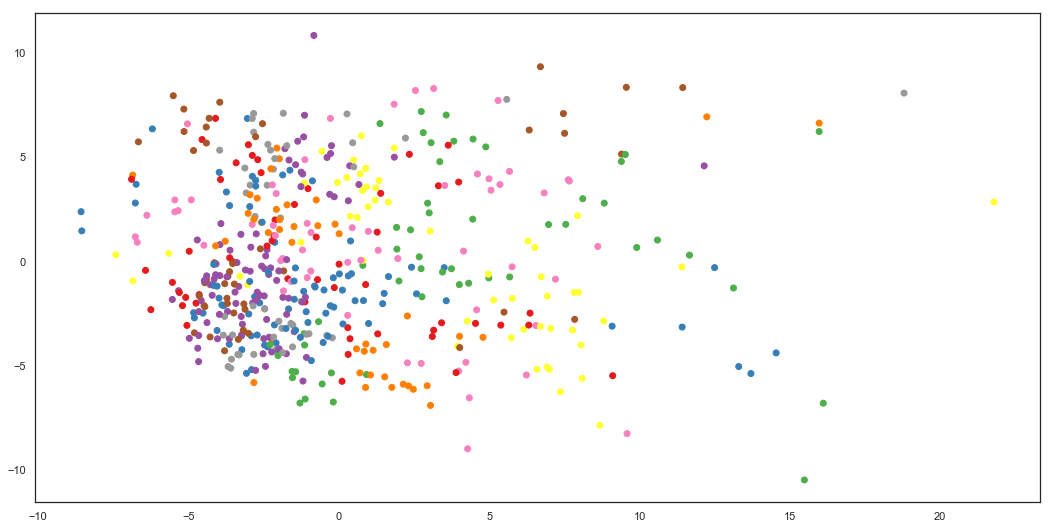

In [318]:
plot_cluster(pca_fitted, cluster.labels_)

In [319]:
df3 = df2.copy(deep=True)

In [325]:
df3.tail()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,label
name,,,,,,,,,,,,,,,,,,,,,
Collin Sexton,0.463305,2.291449,-0.647061,-0.315962,-0.132901,0.0,-0.964117,-0.657629,1.111326,-1.487784,...,0.058234,0.906599,0.602755,-0.428858,0.399905,1.904014,-0.914637,-0.199637,-0.102803,2
Jevon Carter,0.686873,0.220500,0.139091,-0.051999,0.083427,0.0,0.335304,-0.403788,-0.247936,0.265264,...,0.113556,1.144171,0.671130,-1.326443,0.112378,0.112653,-1.115126,1.369330,0.675495,30
Dusty Hannahs,1.900527,-0.541228,-0.745330,-0.632718,-1.394816,0.0,-1.469447,-1.054945,-0.793781,-0.757347,...,-0.550308,-0.360451,-0.707759,-0.511968,-0.791278,0.588837,-0.192877,-1.104810,-1.049381,24
Julian Washburn,-0.345798,-0.434110,-0.401388,-0.527133,0.191591,0.0,0.876729,0.092856,-0.451290,-0.319085,...,-0.799257,-1.073167,-0.605197,-1.459418,-0.935041,-1.451954,-0.112681,-0.863431,-1.343873,24
Yuta Watanabe,-0.462905,-0.505522,-0.499657,-0.579925,-0.872022,0.0,-0.061741,0.412916,-0.515507,-0.465173,...,-1.297155,-0.716809,0.386235,-0.744675,0.091840,-0.182128,-0.794344,-0.561707,-1.196627,41


In [333]:
df3['label'] = cluster.labels_
d_ayton_label = df3[df3.index == 'Collin Sexton'].iloc[0].label

In [335]:
#df3.groupby('label').agg(['count'])

In [336]:
df3[df3['label'] == d_ayton_label]

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,label
name,,,,,,,,,,,,,,,,,,,,,
Dion Waiters,0.793334,1.577329,-0.401388,0.211964,0.227646,0.0,-0.603167,-0.569337,0.554778,0.119177,...,-0.992884,-0.835595,-0.115179,0.136287,-0.072461,0.498135,0.087808,0.162432,0.864811,2
Zach LaVine,1.389515,2.684216,-0.548792,-0.104791,-0.006709,0.0,-0.603167,-0.260313,1.196949,-0.757347,...,-0.660952,-1.073167,-1.072424,-0.445480,-1.099342,-0.998445,-1.315615,-1.346190,-1.491118,2
Brandon Ingram,-0.047707,1.374995,-0.106581,1.267817,0.119482,0.0,0.118734,-0.138911,1.935446,0.265264,...,-0.743935,0.114692,0.397631,-0.944138,0.030227,0.248705,-0.914637,0.102087,-0.523505,2
Kevin Knox,-0.526781,0.375226,-0.303119,0.634306,-0.277120,0.0,-0.494882,-0.039582,2.128097,0.557439,...,0.030573,0.629432,0.215299,-0.196151,0.132916,0.021951,0.087808,-0.441017,-1.028346,2
Collin Sexton,0.463305,2.291449,-0.647061,-0.315962,-0.132901,0.0,-0.964117,-0.657629,1.111326,-1.487784,...,0.058234,0.906599,0.602755,-0.428858,0.399905,1.904014,-0.914637,-0.199637,-0.102803,2


In [271]:
plt.cm.Set1(label)

array([[0.89411765, 0.10196078, 0.10980392, 1.        ],
       [0.89411765, 0.10196078, 0.10980392, 1.        ],
       [0.21568627, 0.49411765, 0.72156863, 1.        ]])

In [ ]:
def test(data, label):
    x_val = data[:, 0]
    y_val = data[:, 1]
    plt.figure(figsize=(18, 9))
    for 

In [259]:
plt.cm.rainbow([0, 0.5, 1])

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [252]:
plt.cm.Set1(cluster.labels_/len(np.unique(cluster.labels_))).shape

(532, 4)

In [248]:
def plot_embedding(X, y, title=None, num=10):
#     x_min = np.min(X, 0)
#     x_max = np.max(X, 0)
#     X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/len(np.unique(y))))
    
#     plt.xticks([])
#     plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [ ]:
def plot_cluster(data, labels):
    for

In [244]:
pca_fitted[0]

array([11.40917276, -0.26131746])

In [ ]:
plt.scatter(pca_fitted[0,0])

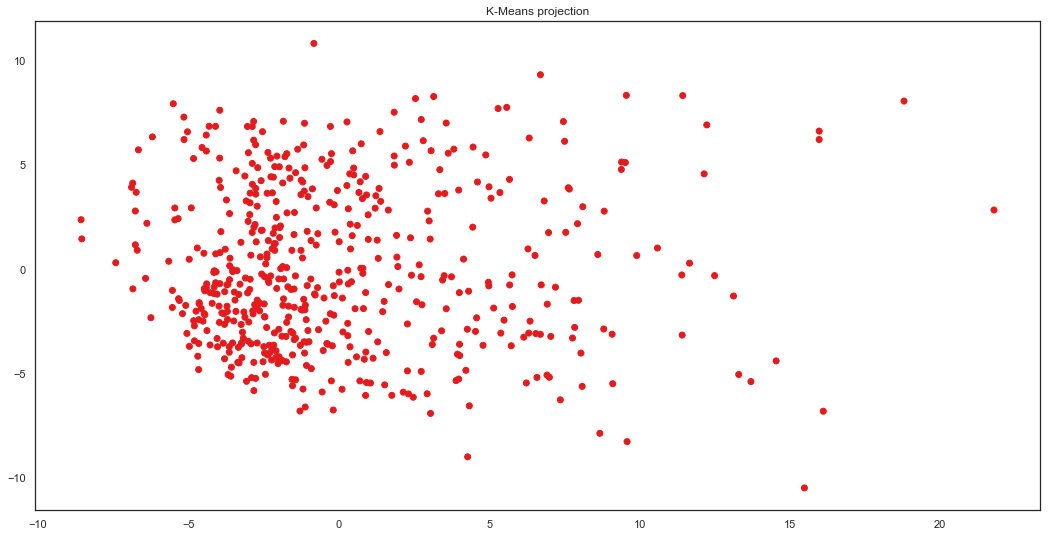

In [249]:
cluster = KMeans(n_clusters=60, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(pca_fitted, cluster.labels_, 'K-Means projection',60)


In [234]:
np.unique(cluster.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int32)

In [119]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [120]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [121]:
subSpace = PCA(n_components=10).fit_transform(df2.values)

In [122]:
subSpace

array([[-3.74797574,  2.60270908, -1.55677085, ..., -0.93539127,
         0.1505615 , -0.52785646],
       [-0.74478489, -4.70745182,  2.1699394 , ...,  2.23379321,
        -0.89291969, -0.01383189],
       [-0.37679405,  3.92053688,  3.12545255, ..., -2.02550468,
         1.5903024 ,  0.07479376],
       ...,
       [ 0.43915616, -4.4768682 ,  2.27399313, ...,  0.13872729,
        -1.0558526 , -0.18902922],
       [ 2.40068451, -3.57555264, -0.29815848, ..., -0.79445909,
         1.02750826,  0.58281544],
       [-0.11753249, -1.27412879,  0.56525614, ..., -0.23193361,
         0.25123751,  1.65032452]])

In [105]:
all_quan.set_index('name')

KeyError: 'name'

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
X = StandardScaler().fit_transform(all_quan)
X

/Users/calvin/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/calvin/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.35496337,  0.08226841, -0.25673091, ...,  0.08780818,
         0.76588093,  0.50721423],
       [ 0.82045258,  1.4620751 , -0.76158865, ..., -0.71414806,
         0.10208721, -0.18694332],
       [-1.12613868, -0.80955786,  0.34909837, ...,  0.88976441,
         1.36932976,  0.86481055],
       ...,
       [-0.69238737, -0.69176949, -0.8625602 , ..., -0.1928765 ,
        -1.10481046, -1.04938149],
       [-0.04705005,  0.03178768, -0.42501683, ..., -0.11268088,
        -0.86343093, -1.34387257],
       [-0.73470457, -0.54032729,  0.55104147, ..., -0.79434368,
        -0.56170651, -1.19662703]])

In [87]:
pca = PCA(n_components=10)
components = pca.fit_transform(X)

In [88]:
principalDf = pd.DataFrame(data=components, columns=range(1, 11))

In [89]:
principalDf.head()

,1,2,3,4,5,6,7,8,9,10
0,-3.747976,2.602709,-1.556771,-0.941098,1.792127,0.733254,0.892591,-0.935389,0.150566,-0.527866
1,-0.744785,-4.707452,2.169939,4.278711,-2.496189,0.109040,0.355604,2.233802,-0.892912,-0.013837
2,-0.376794,3.920537,3.125453,-0.259329,-1.155508,-0.660951,-0.381554,-2.025500,1.590301,0.074815
3,1.655018,4.638337,-1.886170,-1.190878,0.599394,-0.984016,-0.875801,0.268574,0.059664,-0.411993
4,2.375042,6.887177,0.028326,0.509367,-1.242948,1.020968,-1.707580,0.389958,-0.395334,2.400396


In [90]:
print(pca.explained_variance_ratio_)

[0.29719438 0.26771107 0.09136469 0.06401817 0.05559654 0.04141728
 0.02917882 0.02711127 0.0223973  0.01991143]


In [93]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

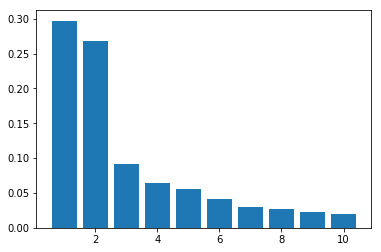

In [99]:
plt.bar(range(1, 11), pca.explained_variance_ratio_)

In [76]:
all_quan.shape

(532, 41)

In [78]:
pca.explained_variance_.shape

(10,)

In [75]:
pca.components_.shape

(10, 41)

In [72]:
print(pca.singular_values_)

[7693.52553584 3104.99794491 2546.78630055 1541.92649894 1158.20966081
 1026.41986266  650.92427313  456.71407249  424.54103803  398.37738298]


In [27]:
train.columns

Index([u'name', u'NCAAB_assist_percentage', u'NCAAB_assists',
       u'NCAAB_block_percentage', u'NCAAB_blocks', u'NCAAB_box_plus_minus',
       u'NCAAB_conference', u'NCAAB_defensive_box_plus_minus',
       u'NCAAB_defensive_rebound_percentage', u'NCAAB_defensive_rebounds',
       u'NCAAB_defensive_win_shares', u'NCAAB_effective_field_goal_percentage',
       u'NCAAB_field_goal_attempts', u'NCAAB_field_goal_percentage',
       u'NCAAB_field_goals', u'NCAAB_free_throw_attempt_rate',
       u'NCAAB_free_throw_attempts', u'NCAAB_free_throw_percentage',
       u'NCAAB_free_throws', u'NCAAB_games_played', u'NCAAB_games_started',
       u'NCAAB_height', u'NCAAB_minutes_played',
       u'NCAAB_offensive_box_plus_minus',
       u'NCAAB_offensive_rebound_percentage', u'NCAAB_offensive_rebounds',
       u'NCAAB_offensive_win_shares', u'NCAAB_personal_fouls',
       u'NCAAB_player_efficiency_rating', u'NCAAB_player_id', u'NCAAB_points',
       u'NCAAB_points_produced', u'NCAAB_position', u'NCAAB

In [ ]:
sns.boxplot(data['Year'], df2['3PA'], ax=ax)

In [9]:
data['NBA_three_point_attempts']

0      219.0
1        4.0
2        2.0
3        0.0
4        0.0
       ...  
527    296.0
528    102.0
529      5.0
530     24.0
531     16.0
Name: NBA_three_point_attempts, Length: 532, dtype: float64